# Diabetes Prediction using DT Regressor

In [5]:
import pandas as pd
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [6]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
# independent and dependent variable
X = pd.DataFrame(dataset.data, columns= dataset.feature_names)
y = dataset['target']

In [8]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [14]:
# split data into train test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state= 42)
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [15]:
# correlation
X_train.corr

<bound method DataFrame.corr of           age       sex       bmi  ...        s4        s5        s6
17   0.070769  0.050680  0.012117  ...  0.034309  0.027364 -0.001078
66  -0.009147  0.050680 -0.018062  ...  0.071210  0.000272  0.019633
137  0.005383 -0.044642  0.049840  ... -0.002592  0.017036 -0.013504
245 -0.027310 -0.044642 -0.035307  ... -0.039493 -0.049872 -0.129483
31  -0.023677 -0.044642 -0.065486  ... -0.076395 -0.037129 -0.042499
..        ...       ...       ...  ...       ...       ...       ...
106 -0.096328 -0.044642 -0.076264  ... -0.039493 -0.059471 -0.083920
270  0.005383  0.050680  0.030440  ... -0.039493  0.008641  0.015491
348  0.030811 -0.044642 -0.020218  ... -0.039493 -0.010903 -0.001078
435 -0.012780 -0.044642 -0.023451  ... -0.002592 -0.038460 -0.038357
102 -0.092695 -0.044642  0.028284  ... -0.039493 -0.005142 -0.001078

[353 rows x 10 columns]>

<Axes: >

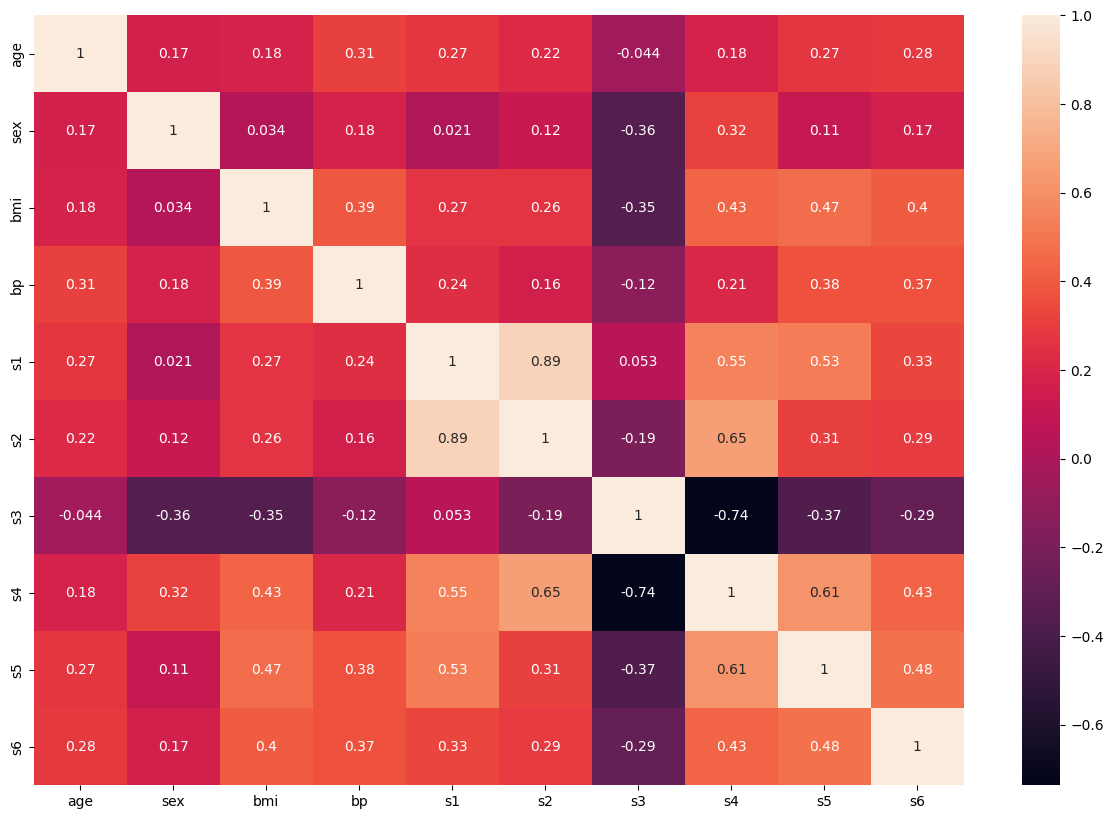

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot= True)

In [17]:
# model
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [18]:
# prediction
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

0.09765225538558464


# Hyperparameter Tuning (GridSearchCV)

In [23]:
param= {
    'criterion':['squared_error','friedman_mse', 'absolute_error'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [24]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()
grid = GridSearchCV(model, param_grid=param, cv =5, scoring= 'neg_mean_squared_error')

In [25]:
# to stop warnings
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [26]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [27]:
# prediction
y_pred = grid.predict(X_test)

In [28]:
# performance matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.2638626566945037
50.367218166735
3900.1673525823808


In [29]:
# TO see the DT based on best_params_
select = DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')
select.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.47115384615384615, 0.9, 'x[9] <= -0.013\nfriedman_mse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.7, 'x[4] <= 0.109\nfriedman_mse = 4416.09\nsamples = 136\nvalue = 125.206'),
 Text(0.3605769230769231, 0.8, 'True  '),
 Text(0.15384615384615385, 0.5, 'x[2] <= -0.062\nfriedman_mse = 4255.877\nsamples = 134\nvalue = 123.5'),
 Text(0.07692307692307693, 0.3, 'x[2] <= -0.072\nfriedman_mse = 1007.528\nsamples = 20\nvalue = 90.85'),
 Text(0.038461538461538464, 0.1, 'friedman_mse = 847.69\nsamples = 10\nvalue = 96.1'),
 Text(0.11538461538461539, 0.1, 'friedman_mse = 1112.24\nsamples = 10\nvalue = 85.6'),
 Text(0.23076923076923078, 0.3, 'x[8] <= -0.004\nfriedman_mse = 4605.93\nsamples = 114\nvalue = 129.228'),
 Text(0.19230769230769232, 0.1, 'friedman_mse = 3210.634\nsamples = 81\nvalue = 108.605'),
 Text(0.2692307692307692, 0.1, 'friedman_mse = 4424.371\nsamples = 33\nvalue = 179.848'),
 Text(0.34615384615384615, 0.5, 'x[7] <= 0.014\nfriedman_mse = 1892.25\nsamples = 2\nv

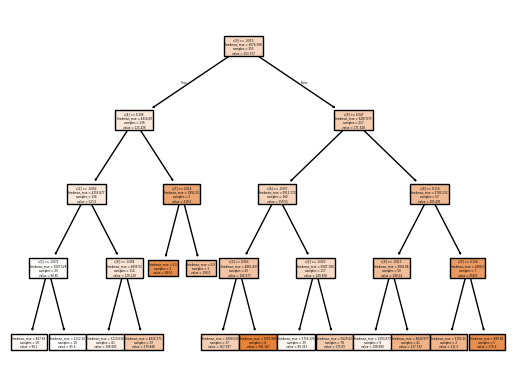

In [33]:
# visualize DT
from sklearn import tree
plt.Figure(figsize=(30,30))
tree.plot_tree(select, filled = True)